In [1]:
#Run only once
%load_ext autoreload
%autoreload 2

In [2]:
cd /home/DeepLearningMachine/JointAngleMeasurement

/home/DeepLearningMachine/JointAngleMeasurement


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from PIL import Image, ImageOps
import cv2 as cv
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools
import imutils
from src.helper_functions import *

import logging
import math
import slidingwindow as sw
import time


In [5]:
#Fix cuDNN incompatibility issue
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [6]:
train_path = 'data/Poses/train'
valid_path = 'data/Poses/valid'
test_path = 'data/Poses/test'

#Load in images and place them into training batches
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['squatting', 'bending', 'raising_shoulders'], batch_size=5)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=['squatting', 'bending', 'raising_shoulders'], batch_size=3)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['squatting', 'bending', 'raising_shoulders'], batch_size=5)

Found 285 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 39 images belonging to 3 classes.


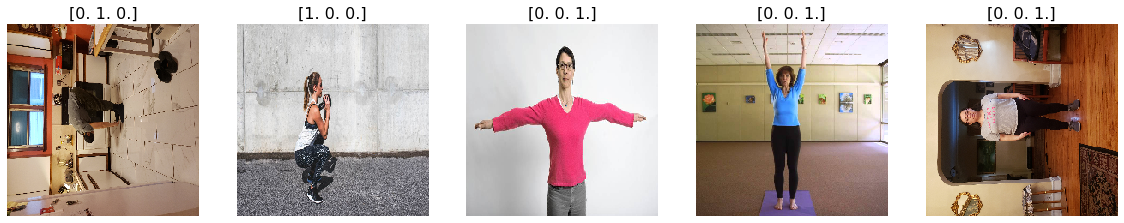

In [7]:
#Plot a batch of images from the training set
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

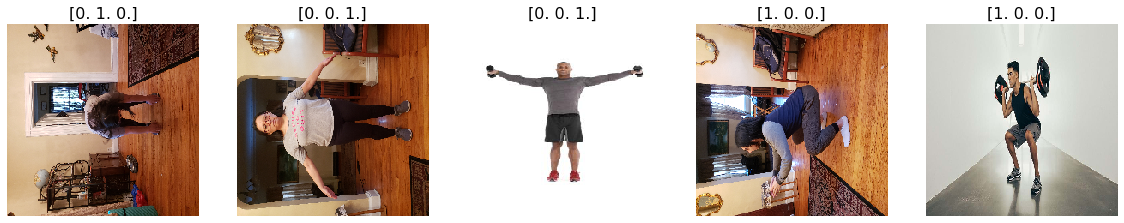

In [8]:
#Plot a batch of images from the test set
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

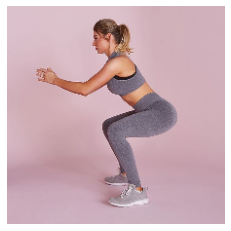

In [9]:
#Load image for pose detection and joint angle measurement
unknown_img = cv.imread('data/Poses/test/squatting/squat_017.jpg')
unknown_img = cv.resize(unknown_img, (224, 224))
plt.imshow(cv.cvtColor(unknown_img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [10]:
#Setup Network and Pose Analysis Model
net, Pose_Analyzer_Model = joint_analysis_setup()

In [11]:
# Read, resize and prepare testing image
string = 'data/Poses/test/squatting/squat_017.jpg'
unknown_img, unknown_img_classify = read_resize_prep_img(string, net, Pose_Analyzer_Model)

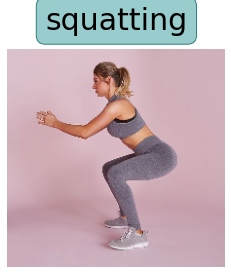

In [12]:
predict_pose(unknown_img_classify, net, Pose_Analyzer_Model)

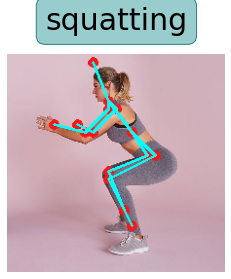

In [13]:
detect_draw_joints(string, net, Pose_Analyzer_Model)

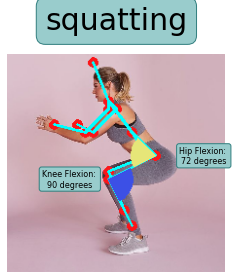

In [17]:
measure_joint_angles(string, net, Pose_Analyzer_Model)